<a href="https://colab.research.google.com/github/RYUseless/BPC-TIN/blob/main/Copy_of_MTIN_08_excercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Předpovězme druh ovoce na základě popisu jeho vlastností (velikost, barva, )

#1) Download Data

In [ ]:
from google.colab import files
from six.moves import urllib
import os

# DOWNLOAD FROM INTERNET AND SAVE  
DATASET_FILE = 'diabetes.csv'
if not os.path.exists(DATASET_FILE):
    DOWNLOAD_URL = 'https://gist.githubusercontent.com/ktisha/c21e73a1bd1700294ef790c56c8aec1f/raw/819b69b5736821ccee93d05b51de0510bea00294/pima-indians-diabetes.csv'
    urllib.request.urlretrieve(DOWNLOAD_URL, DATASET_FILE)

# UPLOAD YOUR OWN DATA
# from google.colab import files
# files.upload()

# 2.1) Show downloaded data

In [ ]:
!ls

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
dia = pd.read_table('diabetes.csv', skiprows = 9, header = None, names = ['tehot', 'gluk', 'tlak', 'triceps', 'inzul', 'bmi', 'dedicnost', 'vek', 'cukrovka'], delimiter=",")
print('Number of samples: '+str(dia.shape))
dia.head(10)


diabetes.csv  sample_data
Number of samples: (768, 9)


,tehot,gluk,tlak,triceps,inzul,bmi,dedicnost,vek,cukrovka
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# 2.2) Count number of samples


(768, 9)
cukrovka
0    500
1    268
dtype: int64


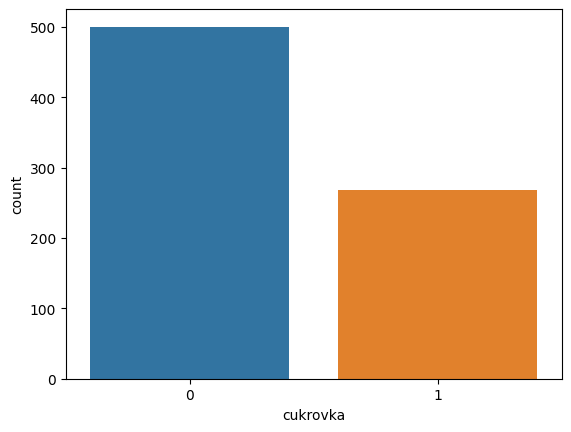

In [ ]:
print(dia.shape)
print(dia.groupby('cukrovka').size())

import seaborn as sns
sns.countplot(x=dia['cukrovka'],label="Count")
plt.show()

In [ ]:
#from pandas.tools.plotting import scatter_matrix
from matplotlib import cm
feature_names = ['tehot', 'gluk', 'tlak', 'triceps', 'inzul', 'bmi', 'dedicnost', 'vek']
X = dia[feature_names]
y = dia['cukrovka']
#cmap = cm.get_cmap('gnuplot')
#scatter = pd.scatter_matrix(X, c = y, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap = cmap)
#plt.suptitle('Scatter-matrix for each input variable')
#plt.savefig('fruits_scatter_matrix')
print(X.shape)
print(y.shape)

(768, 8)
(768,)


# 2.3 Show features statistics

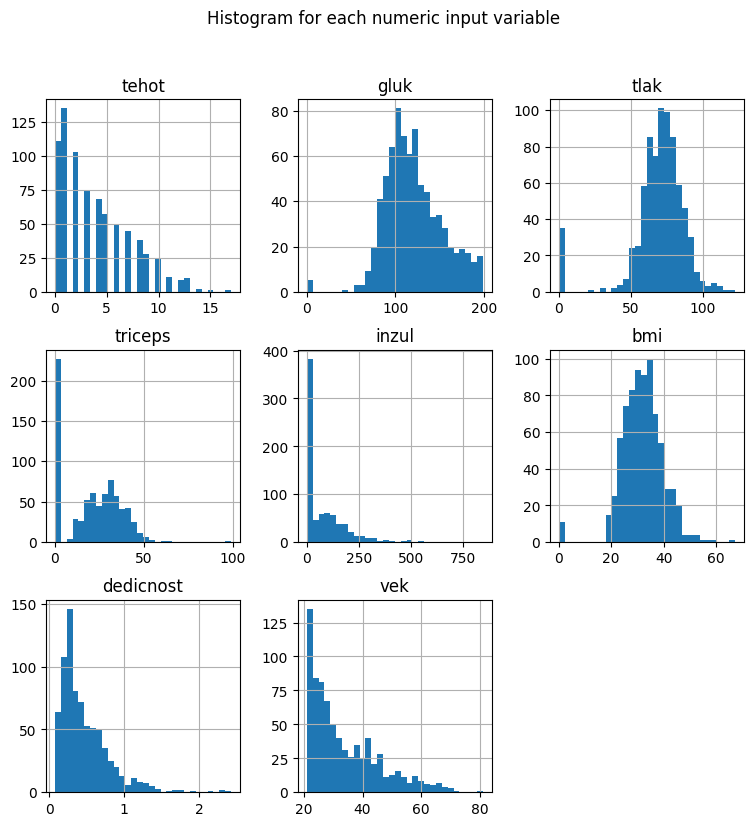

In [ ]:
import pylab as pl
X.hist(bins=30, figsize=(9,9))
pl.suptitle("Histogram for each numeric input variable")
#plt.savefig('fruits_hist')
plt.show() # if you run the code at local machine

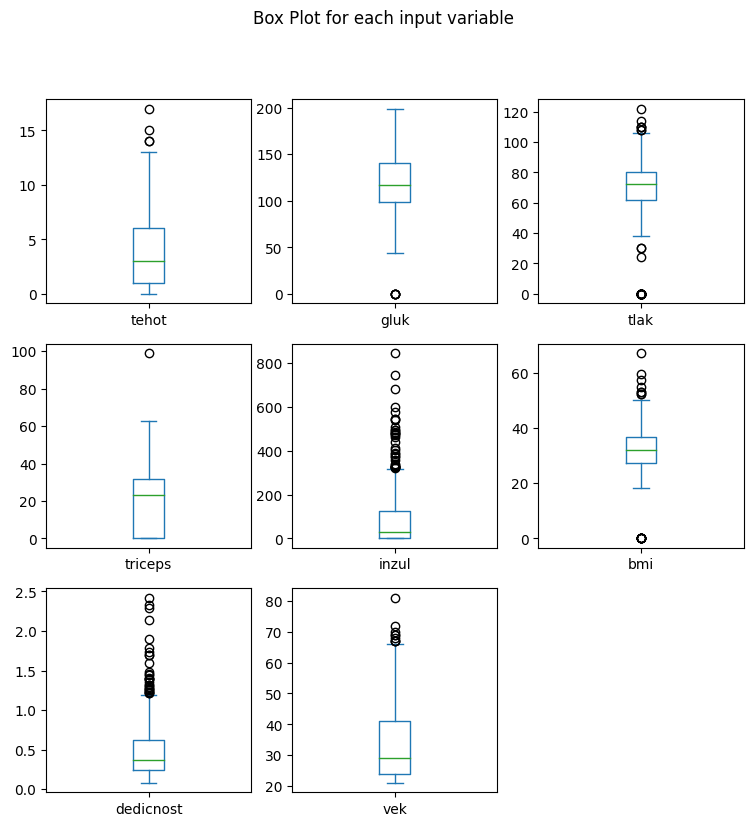

In [ ]:
X.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(9,9), title='Box Plot for each input variable')
# plt.savefig('fruits_box')
plt.show() # if you run the code at local machine

# 3) Create Training and Test Sets and Apply Scaling

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2000)

print('Number of Original :'+str(X.shape))
print('Number of samples Train:'+str(X_train.shape))
print('Number of samples Test: '+str(X_test.shape))

Number of Original :(768, 8)
Number of samples Train:(514, 8)
Number of samples Test: (254, 8)


# 4) Normalize Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

import pandas as pd
#dataset = pd.DataFrame(X_train)
#dataset.head()
dataset2 = pd.DataFrame(X_test)
dataset2.head()

,0,1,2,3,4,5,6,7
0,0.117647,0.562814,0.657895,0.323232,0.000000,0.623037,0.031097,0.000000
1,0.000000,0.432161,0.596491,0.323232,0.000000,0.624782,0.071080,0.066667
2,0.235294,0.648241,0.754386,0.202020,0.319149,0.612565,0.067970,0.033333
3,0.411765,0.597990,0.000000,0.000000,0.000000,0.439791,0.058196,0.266667
4,0.000000,0.507538,0.561404,0.171717,0.000000,0.366492,0.077299,0.000000


# 5) Cross validation
 We use SVM learning algorithm, 3-fold cross validation

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import svm
clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf, X_train, y_train, cv=10)
scores.mean()
scores

array([0.76923077, 0.73076923, 0.80769231, 0.75      , 0.76470588,
       0.66666667, 0.80392157, 0.76470588, 0.78431373, 0.7254902 ])

Sumarizace výsledků (průměr a směrodatná odchylka):

In [ ]:
print("Accuracy: %0.2f (+/- %0.2f) %%" % (100*scores.mean(), 100*scores.std() * 2))

Accuracy: 75.67 (+/- 7.92) %


# 6) Machine learning - from data to knowledge representation

## 6.1) Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.77
Accuracy of Logistic regression classifier on test set: 0.78


## 6.2) Decision trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion="gini").fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.71


## 6.3) k-Nearest Negbours

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 3) 
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.85
Accuracy of K-NN classifier on test set: 0.77


## 6.4) Support Vector Machines

In [ ]:
from sklearn.svm import SVC
svm = SVC() # Needs "probability=True", otherwise probabilities are not computed!
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.80
Accuracy of SVM classifier on test set: 0.81


## 6.5)  Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 3), random_state=1)
nn.fit(X_train, y_train)  
print('Accuracy of NN classifier on training set: {:.2f}'
     .format(nn.score(X_train, y_train)))
print('Accuracy of NN classifier on test set: {:.2f}'
     .format(nn.score(X_test, y_test))) 

Accuracy of NN classifier on training set: 0.78
Accuracy of NN classifier on test set: 0.78


# 7) How to use the model for prediction?

Measured values from sensors:

image.png

Is it: Apple, Mandarin, Banana or Lemon?

In [ ]:
import numpy as np
#data_to_predict = np.array([[192, 8.4, 7.3, 0.55,23]]) # from training set, should be apple
data_to_predict = np.array([[3,74,68,28,45,29.7,0.293,23]])
data_to_predict = scaler.transform(data_to_predict)
print(data_to_predict)

# Predict class
prediction = nn.predict_proba(data_to_predict)
print('Probability of classes:', np.round(prediction[0]*100, decimals=2))

[[0.17647059 0.3718593  0.59649123 0.28282828 0.05319149 0.51832461
  0.09551311 0.03333333]]
Probability of classes: [93.46  6.54]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


  # 8) How to store and load the trained model?

In [ ]:
import pickle

# save the model to disk
filename = 'nn.sav'
pickle.dump(nn, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
prediction = loaded_model.predict(data_to_predict)
prediction

array([0])